## Lab 4: Clustering and Natural Language Vectorization

#### CSC 215 Artificial Intelligence (Spring 2019)

#### Dr. Haiquan Chen, California State University, Sacramento

** California State University, Sacramento **

** CSC 177 (Spring 2019)**

** Dr. Haiquan Chen **

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## Clustering

Scikit-learn has a huge set of tools for clustering. These are in sklearn.cluster. http://scikit-learn.org/stable/modules/clustering.html

### There are 3 functions in all the clustering classes,
<ul>
<li> fit(), 
<li> predict(),
<li> fit_predict(). 
</ul>

#### fit() builds the model from the training data (e.g. for kmeans, it finds the centroids),

#### predict() assigns labels to the data after building the model, and

#### fit_predict() does both at the same data (e.g in kmeans, it finds the centroids and assigns the labels to the dataset).

### 1) K-means clustering 

More on the k-means clustering here: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans


In [2]:
import sklearn.cluster as sk_cluster

X = [[0, 0], [0, 0.3], [0.4, 0.5], [0.6, 0.5], [0.8, 0.8], [1, 1]]

kmeans = sk_cluster.KMeans(n_clusters=3, n_init=10, max_iter=300)  

# n_init: Number of time the k-means algorithm will be run 
# max_iter : int, default: 300

km_labels = kmeans.fit_predict(X)

print ('\n Cluster Centroids')
centroids = kmeans.cluster_centers_
print (centroids)

print ('\nPrinting cluster assignment:')
print(km_labels)


print('\n')
error = kmeans.inertia_       #SSE; Sum of squared distances of samples to their closest cluster center.
print ("The total error of the clustering is: ", error)


 Cluster Centroids
[[0.   0.15]
 [0.9  0.9 ]
 [0.5  0.5 ]]

Printing cluster assignment:
[0 0 2 2 1 1]


The total error of the clustering is:  0.10499999999999998


### Find the best K value

Text(0, 0.5, 'SSE')

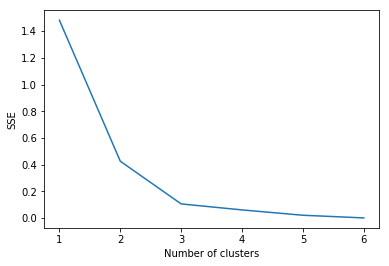

In [3]:
#### Find the best K value

error = np.zeros(7)
for k in range(1,7):
    kmeans = sk_cluster.KMeans(init='k-means++', n_clusters=k, n_init=10)
    kmeans.fit_predict(X)
    error[k] = kmeans.inertia_

plt.plot(range(1, 7), error[1:])
plt.xlabel('Number of clusters')
plt.ylabel('SSE')

## Vectorizing natural lauguage (text) data

Python offers a set of tools for extracting features:http://scikit-learn.org/stable/modules/feature_extraction.html

### CountVectorizer: transforms text into a "sparse matrix" where rows are text and columns are words, and values are occurrence values.

In [6]:
import sklearn.feature_extraction.text as sk_text

vectorizer = sk_text.CountVectorizer(min_df=1)
#vectorizer = sk_text.CountVectorizer(min_df=1, stop_words = 'english')

#min_df: ignore terms that have a document frequency < min_df.

corpus = ['This is the first document.',
           'this is the second second document.',
           'And the third one.',
           'Is this the first first first document?',
          ]

matrix = vectorizer.fit_transform(corpus)

print(type(matrix))          # Compressed Sparse Row matrix
print(matrix.toarray())        #  convert it to numpy array

<class 'scipy.sparse.csr.csr_matrix'>
[[0 1 1 1 0 0 1 0 1]
 [0 1 0 1 0 2 1 0 1]
 [1 0 0 0 1 0 1 1 0]
 [0 1 3 1 0 0 1 0 1]]


In [7]:
print(vectorizer.get_feature_names())

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']


### TfIdfVectorizer: transforms text into a "sparse matrix" where rows are text and columns are words, and values are the tf-dif values. 

More here: http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html#sklearn.feature_extraction.text.TfidfVectorizer

In [8]:
vectorizer = sk_text.TfidfVectorizer(
                             #stop_words='english',
                             max_features = 1000,
                             min_df=1)


#max_features:  build a vocabulary that only consider the top max_features features ordered by term frequency across the corpus.

matrix = vectorizer.fit_transform(corpus)

print(type(matrix))          # Compressed Sparse Row matrix
print(matrix.toarray())        #  convert it to numpy array


<class 'scipy.sparse.csr.csr_matrix'>
[[0.         0.43877674 0.54197657 0.43877674 0.         0.
  0.35872874 0.         0.43877674]
 [0.         0.27230147 0.         0.27230147 0.         0.85322574
  0.22262429 0.         0.27230147]
 [0.55280532 0.         0.         0.         0.55280532 0.
  0.28847675 0.55280532 0.        ]
 [0.         0.23973261 0.88835239 0.23973261 0.         0.
  0.19599711 0.         0.23973261]]


In [9]:
print(vectorizer.get_feature_names())

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']


In [10]:
vectorizer = sk_text.TfidfVectorizer(#stop_words='english',
                             #max_features = 1000,
                             min_df=2, 
                             max_df=500
                             )

#min_df: ignore terms that have a document frequency < min_df.
#max_df: ignore terms that have a document frequency > max_df


matrix = vectorizer.fit_transform(corpus)
print(type(matrix))               # Compressed Sparse Row matrix

tfidf_data = matrix.toarray()     #  convert it to numpy array

print(tfidf_data)

<class 'scipy.sparse.csr.csr_matrix'>
[[0.43877674 0.54197657 0.43877674 0.35872874 0.43877674]
 [0.52210862 0.         0.52210862 0.42685801 0.52210862]
 [0.         0.         0.         1.         0.        ]
 [0.23973261 0.88835239 0.23973261 0.19599711 0.23973261]]


In [11]:
print(vectorizer.get_feature_names())

['document', 'first', 'is', 'the', 'this']


### Once you vectorize the text, you can send the data to models

An example of what we want to do:
http://scikit-learn.org/stable/auto_examples/text/document_clustering.html

In [12]:
tfidf_data

array([[0.43877674, 0.54197657, 0.43877674, 0.35872874, 0.43877674],
       [0.52210862, 0.        , 0.52210862, 0.42685801, 0.52210862],
       [0.        , 0.        , 0.        , 1.        , 0.        ],
       [0.23973261, 0.88835239, 0.23973261, 0.19599711, 0.23973261]])

In [13]:
import sklearn.cluster as sk_cluster
kmeans = sk_cluster.KMeans(n_clusters=2, max_iter=100, n_init=10)

kmeans_labels = kmeans.fit_predict(tfidf_data)

print ('Cluster labels')
print(kmeans_labels)

centroids = kmeans.cluster_centers_
print ('Cluster Centroids')
print(centroids)

error = kmeans.inertia_
print ("The total error of the clustering is: ", error)


Cluster labels
[0 0 1 0]
Cluster Centroids
[[0.40020599 0.47677632 0.40020599 0.32719462 0.40020599]
 [0.         0.         0.         1.         0.        ]]
The total error of the clustering is:  0.5554005528322997


## Clustering analysis:  identify the top terms (i.e., the terms with the highest tfidf scores) per cluster

### Get a list of words sorted by their TFIDF scores in descending order in each cluster. 

In [14]:
print(kmeans.cluster_centers_)

[[0.40020599 0.47677632 0.40020599 0.32719462 0.40020599]
 [0.         0.         0.         1.         0.        ]]


### argsort() returns the indices that would sort an array in ascending order

In [15]:
asc_order_centroids = kmeans.cluster_centers_.argsort()    # argsort() returns the indices that would sort an array.
print(asc_order_centroids)

[[3 0 2 4 1]
 [0 1 2 4 3]]


### Next we got the indices that would sort an array in descending order

In [16]:
des_order_centroids = asc_order_centroids[:,::-1]     #  get the indices that sort array in descending order
print(des_order_centroids)

[[1 4 2 0 3]
 [3 4 2 1 0]]


### Then we print each words based on the indices we just got

In [17]:
terms = vectorizer.get_feature_names()
#print(terms, '\n')

for i in range(2):
    print ("Cluster:", i)
    for ind in des_order_centroids[i, :]:
        print (terms[ind])
    print()    

Cluster: 0
first
this
is
document
the

Cluster: 1
the
this
is
first
document



##  Donot forget to perform <font color='red'> model evaluation </font> to know how good the model is

In [18]:
print ('Cluster labels')
print(kmeans_labels)

Cluster labels
[0 0 1 0]


In [19]:
true = np.array([0, 0, 1, 1])   # ground truth

In [20]:
import sklearn.metrics as metrics

In [21]:
confusion = metrics.confusion_matrix(true, kmeans.labels_, labels=[0, 1])   # first row: 0 ; second row: 1
print(confusion)

[[2 0]
 [1 1]]


In [22]:
metrics.precision_score(true, kmeans.labels_, average='weighted') # weighted: the average precision of all clusters is returned


0.8333333333333333

In [23]:
metrics.recall_score(true, kmeans.labels_, average='weighted')  # weighted: the average recall of all clusters is returned


0.75

In [24]:
metrics.f1_score(true, kmeans.labels_, average= 'weighted')     # weighted: the average f1 of all clusters is returned


0.7333333333333334

## Another example:

In [25]:
document_0 = "Japan's prime minister, Shinzo Abe, is working towards healing the economic turmoil in his own country for his view on the future of his people."
document_1 = "Vladimir Putin is working hard to fix the economy in Russia as the Ruble has tumbled."
document_2 = "What's the future of Abenomics? We asked Shinzo Abe for his views"
document_3 = "Obama has eased sanctions on Cuba while accelerating those against the Russian Economy, even as the Ruble's value falls almost daily."
document_4 = "Vladimir Putin is riding a horse while hunting deer. Vladimir Putin always seems so serious about things - even riding horses. Is he crazy?"


corpus = [document_0, document_1, document_2, document_3, document_4]

In [26]:
vectorizer = sk_text.TfidfVectorizer(stop_words='english',
                             max_features = 100,
                             min_df=1, 
                             #max_df=5
                             )

#min_df: ignore terms that have a document frequency < min_df.
#max_df: ignore terms that have a document frequency > max_df


matrix = vectorizer.fit_transform(corpus)

tfidf_data = matrix.toarray()     #  convert it to numpy array

print(tfidf_data)
print(vectorizer.get_feature_names())
print(len(vectorizer.get_feature_names()))

[[0.23684538 0.         0.         0.         0.29356375 0.
  0.         0.         0.         0.         0.29356375 0.
  0.         0.         0.23684538 0.         0.29356375 0.
  0.         0.         0.29356375 0.29356375 0.         0.29356375
  0.29356375 0.         0.         0.         0.         0.
  0.         0.23684538 0.         0.         0.29356375 0.
  0.29356375 0.         0.         0.23684538]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.29954105
  0.         0.37127341 0.         0.37127341 0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.29954105 0.         0.29954105 0.37127341 0.
  0.         0.         0.         0.37127341 0.         0.
  0.         0.         0.29954105 0.29954105]
 [0.36252618 0.44934185 0.         0.44934185 0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.36252618 0.         0.  

In [27]:
import sklearn.cluster as sk_cluster
kmeans = sk_cluster.KMeans(n_clusters=2, max_iter=100, n_init=10)

kmeans_labels = kmeans.fit_predict(tfidf_data)

print ('Cluster labels')
print(kmeans_labels)

centroids = kmeans.cluster_centers_
print ('Cluster Centroids')
print(centroids)

error = kmeans.inertia_
print ("The total error of the clustering is: ", error)

Cluster labels
[1 0 1 0 0]
Cluster Centroids
[[ 0.00000000e+00 -1.38777878e-17  1.03853589e-01 -1.38777878e-17
   0.00000000e+00  8.54775921e-02  1.03853589e-01  1.03853589e-01
   8.54775921e-02  1.03853589e-01  0.00000000e+00  1.83635439e-01
   1.03853589e-01  1.23757804e-01  0.00000000e+00  1.23757804e-01
   0.00000000e+00  8.54775921e-02  8.54775921e-02  8.54775921e-02
   0.00000000e+00  0.00000000e+00  1.03853589e-01  0.00000000e+00
   0.00000000e+00  2.37772584e-01  1.70955184e-01  1.83635439e-01
   1.23757804e-01  1.03853589e-01  1.03853589e-01  0.00000000e+00
   8.54775921e-02  1.23757804e-01  0.00000000e+00  1.03853589e-01
   0.00000000e+00 -1.38777878e-17  2.37772584e-01  9.98470174e-02]
 [ 2.99685781e-01  2.24670927e-01  0.00000000e+00  2.24670927e-01
   1.46781873e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  1.46781873e-01  0.00000000e+00
   0.00000000e+00  0.00000000e+00  2.99685781e-01  0.00000000e+00
   1.46781873e-01  0.00000000e

In [28]:
asc_order_centroids = kmeans.cluster_centers_.argsort()    # argsort() returns the indices that would sort an array.

des_order_centroids = asc_order_centroids[:,::-1]     #  get the indices that sort array in descending order

In [29]:
terms = vectorizer.get_feature_names()
print ("All the terms:")
print(terms, '\n')

for i in range(2):
    print ("Cluster:", i)
    for ind in des_order_centroids[i, :]:
        print (terms[ind])
    print()  

All the terms:
['abe', 'abenomics', 'accelerating', 'asked', 'country', 'crazy', 'cuba', 'daily', 'deer', 'eased', 'economic', 'economy', 'falls', 'fix', 'future', 'hard', 'healing', 'horse', 'horses', 'hunting', 'japan', 'minister', 'obama', 'people', 'prime', 'putin', 'riding', 'ruble', 'russia', 'russian', 'sanctions', 'shinzo', 'things', 'tumbled', 'turmoil', 'value', 'view', 'views', 'vladimir', 'working'] 

Cluster: 0
vladimir
putin
ruble
economy
riding
russia
fix
hard
tumbled
sanctions
russian
daily
cuba
eased
value
obama
falls
accelerating
working
deer
horse
crazy
hunting
things
horses
healing
prime
country
view
turmoil
shinzo
economic
people
minister
japan
future
abe
asked
views
abenomics

Cluster: 1
abe
shinzo
future
views
abenomics
asked
prime
view
turmoil
country
economic
healing
japan
minister
people
working
putin
obama
value
accelerating
tumbled
things
crazy
cuba
daily
deer
eased
sanctions
economy
falls
fix
russian
hard
russia
horse
horses
vladimir
ruble
riding
hunting

